In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [98]:
df = pd.read_csv('./dataset/HR_comma_sep.csv',
            sep=',')

In [99]:
df.shape

(14999, 10)

In [100]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [101]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [102]:
mapeamento_departamentos = {'sales': 0, 'IT': 6, 'support': 4, 'technical': 3, 'hr': 2, 'accounting': 1, 'management': 5, 'product_mng': 7 , 'marketing': 8, 'RandD': 9}  # Adicione outros departamentos conforme necessário

# Aplicar a transformação à coluna 'department'
df['department'] = df['department'].map(mapeamento_departamentos)

# Exibir o DataFrame atualizado
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,low
1,0.80,0.86,5,262,6,0,1,0,0,medium
2,0.11,0.88,7,272,4,0,1,0,0,medium
3,0.72,0.87,5,223,5,0,1,0,0,low
4,0.37,0.52,2,159,3,0,1,0,0,low


In [103]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,4,low
14995,0.37,0.48,2,160,3,0,1,0,4,low
14996,0.37,0.53,2,143,3,0,1,0,4,low
14997,0.11,0.96,6,280,4,0,1,0,4,low
14998,0.37,0.52,2,158,3,0,1,0,4,low


In [104]:
print(f'O dataset coletado possui {len(df)} linhas')

O dataset coletado possui 14999 linhas


In [105]:
df[df.duplicated()].count()

satisfaction_level       3008
last_evaluation          3008
number_project           3008
average_montly_hours     3008
time_spend_company       3008
Work_accident            3008
left                     3008
promotion_last_5years    3008
department               3008
salary                   3008
dtype: int64

In [106]:
df.drop_duplicates(inplace=True)

In [107]:
df[df.duplicated()].count()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [108]:
print(f'O dataset coletado possui {len(df)} linhas')

O dataset coletado possui 11991 linhas


In [109]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [110]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [113]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,3.361438
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,2.826709
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,6.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  int64  
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(7), object(1)
memory usage: 1.0+ MB


<Axes: title={'center': 'Grafico BOXPLOT'}, xlabel='average_montly_hours', ylabel='salary'>

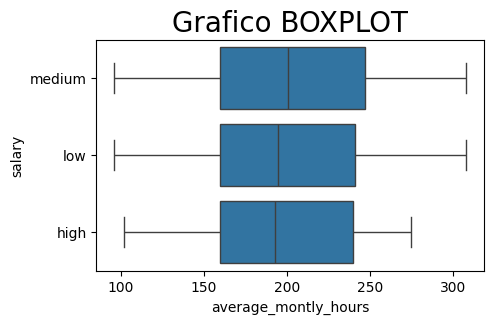

In [115]:
plt.figure(figsize=(5,3))
plt.title('Grafico BOXPLOT', size=20)
sns.boxplot(data=df.query('department == 6'), 
             x='average_montly_hours',  
             y='salary' 
             )

In [116]:
mapeamento_catSalarial = {'low': 0, 'medium': 1, 'high': 2} 
# Aplicar a transformação à coluna 'department'
df['salary'] = df['salary'].map(mapeamento_catSalarial)

# Exibir o DataFrame atualizado
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [157]:
#Qual departamento registrou a maior média de horas trabalhadas por funcionário  
#e qual foi o número médio de projetos executados por funcionário nesse departamento?

media_horas_por_departamento = df.groupby('department')['average_montly_hours'].mean()

# Calcular o número médio de projetos por departamento
media_projetos_por_departamento = df.groupby('department')['number_project'].mean()

# Encontrar o departamento com a maior média de horas trabalhadas por funcionário
departamento_maior_media_horas = media_horas_por_departamento.idxmax()
maior_media_horas = media_horas_por_departamento.max()

# Encontrar o número médio de projetos para o departamento com a maior média de horas trabalhadas
media_projetos_departamento_maior_media_horas = media_projetos_por_departamento[departamento_maior_media_horas]

print("Departamento com a maior média de horas trabalhadas por funcionário:", departamento_maior_media_horas)
print("Média de horas trabalhadas por funcionário nesse departamento:", maior_media_horas)
print("Número médio de projetos por funcionário nesse departamento:", media_projetos_departamento_maior_media_horas)

grouped = df.groupby('department')
print(grouped.agg(media_horas_trabalhadas=('average_montly_hours', 'mean'), 
            media_projetos=('number_project', 'mean')).sort_values(by='media_horas_trabalhadas', ascending=False))

Departamento com a maior média de horas trabalhadas por funcionário: 5
Média de horas trabalhadas por funcionário nesse departamento: 201.52981651376146
Número médio de projetos por funcionário nesse departamento: 3.8371559633027523
            media_horas_trabalhadas  media_projetos
department                                         
5                        201.529817        3.837156
9                        201.291066        3.850144
3                        201.115419        3.859180
1                        200.877617        3.834138
6                        200.638320        3.797131
4                        200.627128        3.820977
0                        200.242050        3.777092
8                        199.487370        3.720654
2                        199.371048        3.675541
7                        198.893586        3.794461


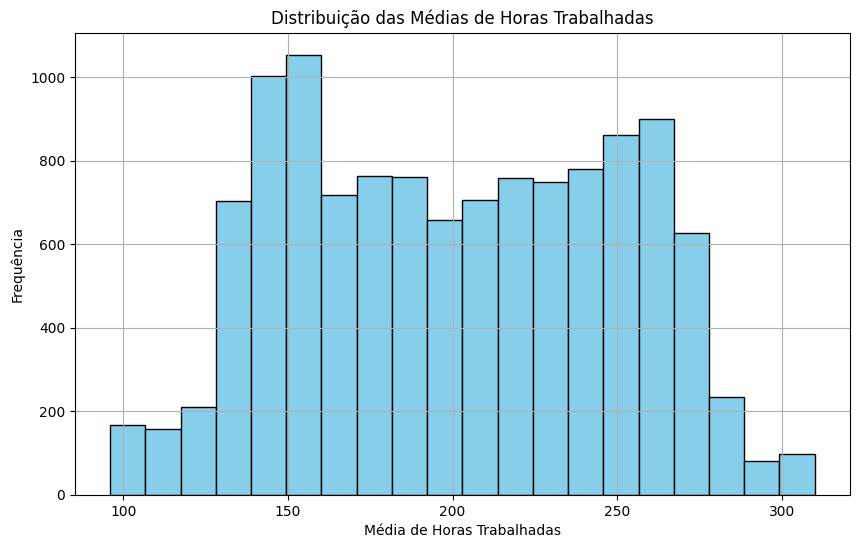

In [118]:
#Construa um histograma que ilustre a distribuição das médias de horas trabalhadas na empresa de todos os profissionais. 
# Configure o gráfico com 20 barras para proporcionar uma representação visual detalhada.
plt.figure(figsize=(10, 6))  # Tamanho do gráfico
plt.hist(df['average_montly_hours'], bins=20, color='skyblue', edgecolor='black')  # Histograma com 20 barras
plt.title('Distribuição das Médias de Horas Trabalhadas')  # Título do gráfico
plt.xlabel('Média de Horas Trabalhadas')  # Rótulo do eixo x
plt.ylabel('Frequência')  # Rótulo do eixo y
plt.grid(True)  # Ativar a grade do gráfico
plt.show() 

department
0    3239
3    2244
4    1821
6     976
9     694
7     686
8     673
1     621
2     601
5     436
Name: count, dtype: int64

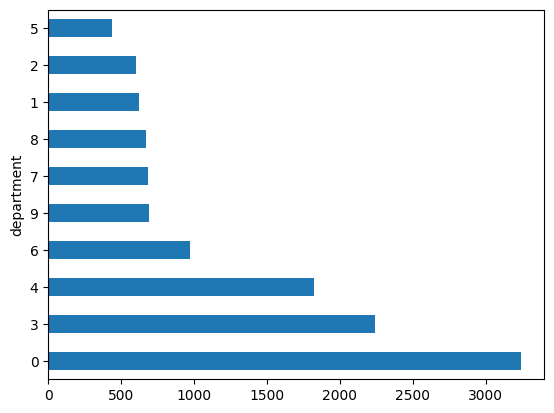

In [119]:
# grafico de barras
categoria = df['department'].value_counts()
categoria.plot.barh()
categoria

In [120]:
# Tabela Cruzada
pd.crosstab(df['department'], df['left'])

left,0,1
department,,
0,2689,550
1,512,109
2,488,113
3,1854,390
4,1509,312
5,384,52
6,818,158
7,576,110
8,561,112


In [141]:
#Qual é média do nível de satisfação dos profissionais que são do departamento de TI e que saíram da empresa?
profIT = df[(df['department'] == 6) & (df['left'] == 1)]
print('O nível de satisfação dos profissionais de Ti que sairam da empresa é: ' + str(profIT['satisfaction_level'].mean()))
profIT.describe()

O nível de satisfação dos profissionais de Ti que sairam da empresa é: 0.41708860759493677


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0,158.000000,158.0,158.000000
mean,0.417089,0.715759,3.930380,209.537975,3.835443,0.044304,1.0,0.012658,6.0,0.474684
std,0.264790,0.193928,1.868673,63.678495,0.915964,0.206423,0.0,0.112150,0.0,0.549457
min,0.090000,0.450000,2.000000,127.000000,2.000000,0.000000,1.0,0.000000,6.0,0.000000
25%,0.110000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000,6.0,0.000000
50%,0.400000,0.790000,4.000000,232.500000,4.000000,0.000000,1.0,0.000000,6.0,0.000000
75%,0.560000,0.890000,6.000000,264.000000,5.000000,0.000000,1.0,0.000000,6.0,1.000000
max,0.920000,1.000000,7.000000,308.000000,6.000000,1.000000,1.0,1.000000,6.0,2.000000


In [142]:
!pip install imblearn

In [143]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.ensemble import RandomForestClassifier

In [144]:
#BALANCEANDO OS DADOS

x_dados = df.drop('left', axis=1).values #todos atributos menos a variavel label
y_dados = df['left'].values # os labels diabeticos ou n diabeticos

In [145]:
def balanceamento_dados(x_dados, y_dados):
    undersampler = RandomUnderSampler(random_state=42)
    random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=100)
    x_under, y_under = undersampler.fit_resample(x_dados, y_dados)
    tl = TomekLinks(sampling_strategy='all')
    x_under, y_under = tl.fit_resample(x_under, y_under)
    return x_under, y_under

In [146]:
# aplicando a técnica de balenceamento de dados

x_dados_balanceados, y_dados_balanceados = balanceamento_dados(x_dados, y_dados)

In [147]:
print(len(x_dados_balanceados), len(y_dados_balanceados))

3842 3842


In [148]:
#outra forma de verificar o balanceamento
import collections
print(collections.Counter(y_dados_balanceados))

Counter({0: 1921, 1: 1921})


In [149]:
# Separando dados para testes e treino
# 30% para teste e 70% para treino (test_size)
def separa_treino_teste(x_dados_balanceados, y_dados_balanceados):
    x_train, x_test, y_train, y_test = train_test_split(x_dados_balanceados,y_dados_balanceados, random_state=42, test_size=0.3)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = separa_treino_teste(x_dados_balanceados, y_dados_balanceados)

In [150]:
from sklearn.ensemble import RandomForestClassifier

#criar o classificador random forest

classifier = RandomForestClassifier(random_state=42)

#cria modelo de classificação
modelo = classifier.fit(x_train, y_train)

# Realiza predições
y_pred = modelo.predict(x_test)

In [151]:
# FEATURE IMPORTANCE
           
pd.DataFrame(modelo.feature_importances_, columns=['importancia'],
             index= ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
                     'Work_accident', 'promotion_last_5years', 'department', 'salary']).sort_values('importancia', ascending=False)


,importancia
satisfaction_level,0.283852
time_spend_company,0.269600
number_project,0.148844
average_montly_hours,0.141730
last_evaluation,0.126530
department,0.012917
salary,0.008638
Work_accident,0.007549
promotion_last_5years,0.000340


In [132]:
print("Quantidade de registros selecionados para teste: ", len(x_test))
print("Quantidade de registros selecionados para treinamento:", len(x_train))

Quantidade de registros selecionados para teste:  1153
Quantidade de registros selecionados para treinamento: 2689


In [134]:
# Calculando a acuracia do modelo

acuracia = accuracy_score(y_test, y_pred)
print('Precisão: ', acuracia)

Precisão:  0.9722463139635733


In [37]:
import numpy as np

In [38]:
# Matriz de confusão

cm = confusion_matrix(y_test, y_pred)
cm

array([[600,   4],
       [ 28, 521]], dtype=int64)

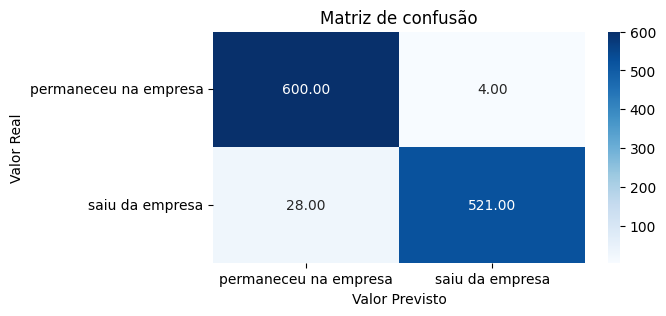

In [160]:
# Visualizando matriz de confusão
# 0 permaneceu na empresa
# 1 saiu da empresa
labels=['permaneceu na empresa', 'saiu da empresa']
plt.figure(figsize=(6,3))
sns.heatmap(data=cm,annot=True,cmap='Blues', fmt=".2f", xticklabels=labels,yticklabels=labels)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de confusão')
plt.show()

In [161]:
# Calculando metricas de avaliação de modelo

# Gerar relatorio de classificação
report = classification_report(y_test,y_pred)

#IMprimir
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       604
           1       0.99      0.95      0.97       549

    accuracy                           0.97      1153
   macro avg       0.97      0.97      0.97      1153
weighted avg       0.97      0.97      0.97      1153

